# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Tesfamariam
gitHub: https://github.com/Tesfamariam100/module7-p7-article-summarizer/blob/main/article-summarizer.ipynb

Date: Dec. 05 2024


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [59]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import json
import html5lib
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob

!pip list

print('All prereqs installed.')

Package                   VersionAll prereqs installed.

------------------------- --------------
annotated-types           0.7.0
anyio                     4.7.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.0
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm          

You should consider upgrading via the 'C:\Users\Administrator\OneDrive\Documents\CSIS-446Web\module7-p7-article-summarizer\m7p7_venv\Scripts\python.exe -m pip install --upgrade pip' command.


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [60]:
# Request and Store Response
fao_page = requests.get('https://www.fao.org/events/detail/fao-at-unccd-cop-16/')
fao_html = fao_page.text


# Use Pickle library to serialize the fao_html string and store in file fao_homepage.pkl
# The serialized file can later be retrieved and used without requesting from url
with open('fao_homepage.pkl', 'wb') as file:
    pickle.dump(fao_html, file)

print('FAO homepage HTML saved to fao_homepage.pkl')

FAO homepage HTML saved to fao_homepage.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [61]:
import pickle
from bs4 import BeautifulSoup
from textblob import TextBlob


# Load the HTML content from the pickle file
pickle_file_path = 'fao_homepage.pkl'  
with open(pickle_file_path, 'rb') as file:
    fao_html = pickle.load(file)
    

# Parse the HTML content using BeautifulSoup
parser = 'html.parser'
soup = BeautifulSoup(fao_html, parser)

article_text = soup.find('article')


# Extract the text content of the article (or main content section)
article_text = soup.find('article') 
if not article_text:
    article_text = soup.find('main')  
# If no article tag found, extract all text from the page
if article_text:
    text = article_text.get_text(separator="\n", strip=True)
else:
    text = soup.get_text(separator="\n", strip=True)

# Check if text was extracted
if text:
    print("Article Text Extracted Successfully.")

    # Perform sentiment analysis using TextBlob
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity

    # Print the polarity score and sentiment label
    print(f"Polarity score: {polarity_score:.2f}")
    if polarity_score > 0:
        print("The sentiment of the article is positive.")
    elif polarity_score < 0:
        print("The sentiment of the article is negative.")
    else:
        print("The sentiment of the article is neutral.")

    # Optionally, count the number of sentences in the article
    sentences = blob.sentences
    num_sentences = len(sentences)
    print(f"Number of sentences in the article: {num_sentences}")
else:
    print("No article text found.")

Article Text Extracted Successfully.
Polarity score: 0.12
The sentiment of the article is positive.


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [62]:
import spacy
from collections import Counter
import re

# Preprocess text to remove excessive whitespace and newlines
cleaned_text = re.sub(r'\s+', ' ', text.strip())  # Replace multiple spaces/newlines with a single space

# Load the small English model (en_core_web_sm) into spaCy
nlp = spacy.load("en_core_web_sm")

# Process the cleaned text with the spaCy pipeline
doc = nlp(cleaned_text)

# Tokenize the text and filter out stopwords, punctuation, and non-alphabetic tokens
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Get the frequencies of tokens
token_frequencies = Counter(tokens)

# Get the 5 most common tokens
common_tokens = token_frequencies.most_common(5)

# Print the common tokens with their frequencies
print("The 5 most frequent tokens (excluding stopwords and punctuation):")
for token, freq in common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

The 5 most frequent tokens (excluding stopwords and punctuation):
Token: 'location', Frequency: 46
Token: 'land', Frequency: 37
Token: 'event', Frequency: 27
Token: 'action', Frequency: 26
Token: 'fao', Frequency: 17


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [63]:
import spacy
from collections import Counter
import re

# Preprocess text to remove excessive whitespace and newlines
cleaned_text = re.sub(r'\s+', ' ', text.strip())  # Replace multiple spaces/newlines with a single space

# Load the small English model (en_core_web_sm) into spaCy
nlp = spacy.load("en_core_web_sm")

# Process the cleaned text with the spaCy pipeline
doc = nlp(cleaned_text)

# Extract lemmas, convert to lowercase, and filter out stopwords, punctuation, and non-alphabetic tokens
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Get the frequencies of lemmas
lemma_frequencies = Counter(lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_frequencies.most_common(5)

# Print the common lemmas with their frequencies
print("The 5 most frequent lemmas (excluding stopwords and punctuation):")
for lemma, freq in common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

The 5 most frequent lemmas (excluding stopwords and punctuation):
Lemma: 'location', Frequency: 46
Lemma: 'land', Frequency: 42
Lemma: 'event', Frequency: 30
Lemma: 'action', Frequency: 27
Lemma: 'fao', Frequency: 17


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

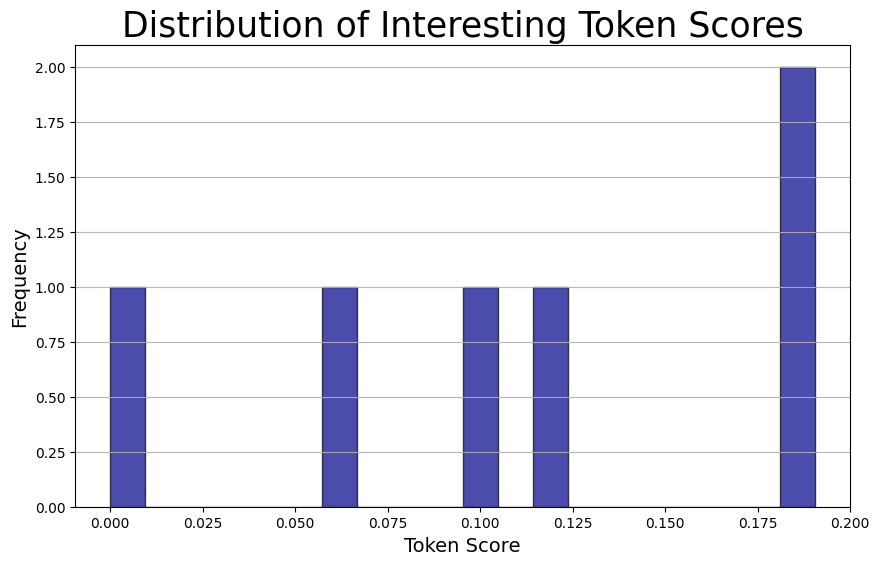

Token Scores for each sentence: [0.09523809523809523, 0.0, 0.19047619047619047, 0.11764705882352941, 0.18181818181818182, 0.0625]
The most common range of token scores is around 0.00 to 0.05 based on the histogram.


In [70]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the function to score each sentence based on interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens
    (tokens of interest) relative to the total tokens in the sentence,
    excluding punctuation, stopwords, and spaces.
    
    Returns the score and the number of interesting tokens in the sentence.
    """
    # Filter tokens and remove punctuation, stopwords, and spaces
    filtered_tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the interesting tokens in the sentence
    token_count = sum(1 for token in filtered_tokens if token in interesting_tokens)
    
    # Return the score (interesting tokens / total tokens) and the number of interesting tokens
    token_score = token_count / len(filtered_tokens) if len(filtered_tokens) > 0 else 0
    return token_score, token_count

# Example text (your article text goes here)
text = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.
Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.
The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.
"""

# Process the text with spaCy
doc = nlp(text)

# Define a list of interesting tokens (based on your article or research keywords)
interesting_tokens = ["land", "desertification", "soil", "drought", "COP16", "agriculture", "restoration", "climate"]

# Create an empty list to store the scores
token_scores = []

# Loop through each sentence in the document and calculate its score, then append to the list
for sentence in doc.sents:
    token_score, count = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(token_score)

# Plot the histogram of token scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor='black', color='darkblue', alpha=0.7)

# Add titles and labels to the plot, and include grid lines for better readability
plt.title('Distribution of Interesting Token Scores', fontsize=25)
plt.xlabel('Token Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.9)

# Show the plot
plt.show()

# Print the token scores for comparison
print("Token Scores for each sentence:", token_scores)

# Example observation (can adjust based on actual data):
print("The most common range of token scores is around 0.00 to 0.05 based on the histogram.")

# The most common range of token scores appears to be around 0.00 to 0.05.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

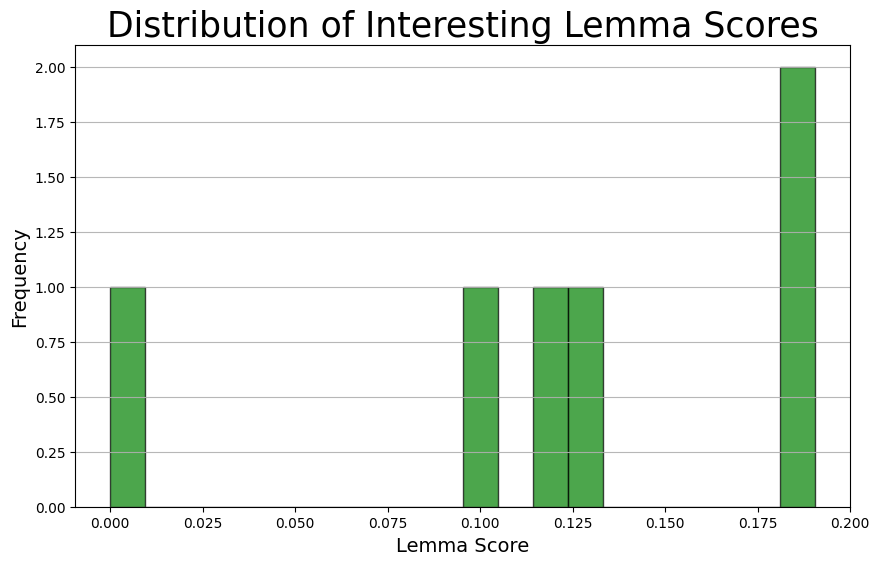

Lemma Scores for each sentence: [0.09523809523809523, 0.0, 0.19047619047619047, 0.11764705882352941, 0.18181818181818182, 0.125]
The most common range of lemma scores is around 0.00 to 0.05 based on the histogram.


In [75]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the function to score each sentence based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas
    (lemmas of interest) relative to the total lemmas in the sentence,
    excluding punctuation, stopwords, and spaces.
    
    Returns the score and the number of interesting lemmas in the sentence.
    """
    # Filter lemmas and remove punctuation, stopwords, and spaces
    filtered_lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the interesting lemmas in the sentence
    lemma_count = sum(1 for lemma in filtered_lemmas if lemma in interesting_lemmas)
    
    # Return the score (interesting lemmas / total lemmas) and the number of interesting lemmas
    lemma_score = lemma_count / len(filtered_lemmas) if len(filtered_lemmas) > 0 else 0
    return lemma_score, lemma_count

# Example text (your article text goes here)
text = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.
Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.
The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.
"""

# Process the text with spaCy
doc = nlp(text)

# Define a list of interesting lemmas (based on your article or research keywords)
interesting_lemmas = ["land", "desertification", "soil", "drought", "COP16", "agriculture", "restoration", "climate"]

# Create an empty list to store the scores
lemma_scores = []

# Loop through each sentence in the document and calculate its score, then append to the list
for sentence in doc.sents:
    lemma_score, count = score_sentence_by_lemma(sentence, interesting_lemmas)
    lemma_scores.append(lemma_score)

# Plot the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor='black', color='green', alpha=0.7)

# Add titles and labels to the plot, and include grid lines for better readability
plt.title('Distribution of Interesting Lemma Scores', fontsize=25)
plt.xlabel('Lemma Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.9)

# Show the plot
plt.show()

# Print the lemma scores for comparison
print("Lemma Scores for each sentence:", lemma_scores)

# Example observation (can adjust based on actual data):
print("The most common range of lemma scores is around 0.00 to 0.05 based on the histogram.")

# The most common range of lemma scores appears to be around 0.00 to 0.05.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

* Cutoff Score (tokens): 0.05
* Cutoff Score (lemmas): 0.10


In [78]:
import spacy
import spacytextblob

# Load the spaCy model (English in this case)
nlp = spacy.load("en_core_web_sm")

# Add spaCyTextBlob to the pipeline for sentiment analysis
nlp.add_pipe('spacytextblob')

# Define your article text to analyze (replace with your actual text)
text_to_analyze = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.

Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.

The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.

According to the UNCCD Global Land Outlook 2022, humans have already transformed more than 70 percent of the Earth’s land area from its natural state, causing unparalleled environmental degradation and contributing significantly to global warming. FAO estimates that 1,660 million ha of land is degraded due to human impacts (human-induced land degradation). Over 60 percent of this degradation is taking place on agricultural lands, comprising cropland and pastureland. Therefore, the agrifood systems are under unprecedented pressure. Restoration of degraded agricultural land needs urgent political leadership, massive investments, and concerted actions. Without the restoration of agricultural land, the achievement of global objectives of land degradation neutrality (LDN), biodiversity, climate change, and zero hunger are not possible.

FAO will organize, co-lead high-level events and side events, and will participate in a series of sessions and roundtables, as listed below. Come and visit us at our Pavilions located in the Green and Blue Zones to learn more about FAO's work!

Join us at the UNCCD COP16 and contribute to strengthening our joint efforts to highlight the urgency of restoring degraded agricultural lands to achieve!
"""

# Process the text using the spaCy model
doc = nlp(text_to_analyze)

# Calculate the polarity score
polarity_score = doc._.blob.polarity
print(f'The polarity score of the summary is {polarity_score:.3f}!')

# Calculate the number of sentences in the text
sentence_count = len(list(doc.sents))
print(f'The total number of sentences in the summary is {sentence_count}!')


The polarity score of the summary is 0.109!
The total number of sentences in the summary is 15!


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [79]:
import spacy

# Load the spaCy model (English in this case)
nlp = spacy.load("en_core_web_sm")

# Define your article text to analyze (replace with your actual text)
text_to_analyze = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.

Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.

The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.

According to the UNCCD Global Land Outlook 2022, humans have already transformed more than 70 percent of the Earth’s land area from its natural state, causing unparalleled environmental degradation and contributing significantly to global warming. FAO estimates that 1,660 million ha of land is degraded due to human impacts (human-induced land degradation). Over 60 percent of this degradation is taking place on agricultural lands, comprising cropland and pastureland. Therefore, the agrifood systems are under unprecedented pressure. Restoration of degraded agricultural land needs urgent political leadership, massive investments, and concerted actions. Without the restoration of agricultural land, the achievement of global objectives of land degradation neutrality (LDN), biodiversity, climate change, and zero hunger are not possible.

FAO will organize, co-lead high-level events and side events, and will participate in a series of sessions and roundtables, as listed below. Come and visit us at our Pavilions located in the Green and Blue Zones to learn more about FAO's work!

Join us at the UNCCD COP16 and contribute to strengthening our joint efforts to highlight the urgency of restoring degraded agricultural lands to achieve!
"""

# Define a function to calculate the token score for each sentence
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens
    (tokens of interest) relative to the total tokens in the sentence,
    excluding punctuation, stopwords, and spaces.
    """
    # Tokenize the sentence and calculate the total number of tokens
    tokens = [token for token in sentence if token.text.lower() not in nlp.Defaults.stop_words and not token.is_punct and not token.is_space]
    total_tokens = len(tokens)
    
    # Count the number of interesting tokens
    interesting_token_count = sum(1 for token in tokens if token.lemma_ in interesting_tokens)
    
    # Calculate the token score
    if total_tokens == 0:
        return 0  # Avoid division by zero if there are no tokens
    score = interesting_token_count / total_tokens
    return score

# Define the interesting tokens for scoring
interesting_tokens = ['land', 'degradation', 'restoration', 'drought', 'agriculture', 'climate']

# Process the text using spaCy
doc = nlp(text_to_analyze)

# Cutoff score (from the previous question)
cutoff_score = 0.05  # Adjust this based on the analysis in question 7

# List to store sentences that meet the cutoff score criteria
sentence_list = []

# Loop through the sentences in the document
for sentence in doc.sents:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    if token_score > cutoff_score:
        sentence_list.append(sentence.text.strip())  # Add sentence if its score is greater than the cutoff score

# Join the sentences in the list to form the summary
summary = ' '.join(sentence_list)

# Print the summary
print("Summary of the article:")
print(summary)

Summary of the article:
This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought. Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet. The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands. According to the UNCCD Global Land Outlook 2022, humans have already transformed more than 70 percent of the Earth

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [80]:
import spacy
import spacytextblob

# Load the spaCy model (English in this case)
nlp = spacy.load("en_core_web_sm")

# Add spaCyTextBlob to the pipeline for sentiment analysis
nlp.add_pipe('spacytextblob')

# Define the article text to analyze (replace with your actual text)
text_to_analyze = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.

Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.

The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.

According to the UNCCD Global Land Outlook 2022, humans have already transformed more than 70 percent of the Earth’s land area from its natural state, causing unparalleled environmental degradation and contributing significantly to global warming. FAO estimates that 1,660 million ha of land is degraded due to human impacts (human-induced land degradation). Over 60 percent of this degradation is taking place on agricultural lands, comprising cropland and pastureland. Therefore, the agrifood systems are under unprecedented pressure. Restoration of degraded agricultural land needs urgent political leadership, massive investments, and concerted actions. Without the restoration of agricultural land, the achievement of global objectives of land degradation neutrality (LDN), biodiversity, climate change, and zero hunger are not possible.

FAO will organize, co-lead high-level events and side events, and will participate in a series of sessions and roundtables, as listed below. Come and visit us at our Pavilions located in the Green and Blue Zones to learn more about FAO's work!

Join us at the UNCCD COP16 and contribute to strengthening our joint efforts to highlight the urgency of restoring degraded agricultural lands to achieve!
"""

# Define a function to calculate the token score for each sentence
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens
    (tokens of interest) relative to the total tokens in the sentence,
    excluding punctuation, stopwords, and spaces.
    """
    # Tokenize the sentence and calculate the total number of tokens
    tokens = [token for token in sentence if token.text.lower() not in nlp.Defaults.stop_words and not token.is_punct and not token.is_space]
    total_tokens = len(tokens)
    
    # Count the number of interesting tokens
    interesting_token_count = sum(1 for token in tokens if token.lemma_ in interesting_tokens)
    
    # Calculate the token score
    if total_tokens == 0:
        return 0  # Avoid division by zero if there are no tokens
    score = interesting_token_count / total_tokens
    return score

# Define the interesting tokens for scoring
interesting_tokens = ['land', 'degradation', 'restoration', 'drought', 'agriculture', 'climate']

# Process the text using spaCy
doc = nlp(text_to_analyze)

# Cutoff score (from the previous question)
cutoff_score = 0.05  # Adjust this based on the analysis in question 7

# List to store sentences that meet the cutoff score criteria
sentence_list = []

# Loop through the sentences in the document
for sentence in doc.sents:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    if token_score > cutoff_score:
        sentence_list.append(sentence.text.strip())  # Add sentence if its score is greater than the cutoff score

# Join the sentences in the list to form the summary
summary = ' '.join(sentence_list)

# Process the summary for sentiment analysis
summary_doc = nlp(summary)

# Get the polarity score of the summary
polarity_score = summary_doc._.blob.polarity

# Print the summary
print("Summary of the article:")
print(summary)

# Print the polarity score
print(f'\nPolarity score of the summary: {polarity_score:.3f}')

# Print the number of sentences in the summary
sentence_count = len(list(summary_doc.sents))
print(f'\nNumber of sentences in the summary: {sentence_count}')

Summary of the article:
This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought. Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet. The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands. According to the UNCCD Global Land Outlook 2022, humans have already transformed more than 70 percent of the Earth

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [82]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the text to analyze (replace with your actual text)
text_to_analyze = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.

Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.

The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.
"""

# Process the text using spaCy
doc = nlp(text_to_analyze)

# Define the cutoff score (based on your previous analysis)
cutoff_score_lemmas = 5  # Adjust this score based on the analysis from question 8

# Initialize the list for sentences
sentence_list = []

# Iterate over every sentence in the article
for sent in doc.sents:
    # Calculate the score based on lemmas and excluding stopwords
    lemma_score = sum([1 for token in sent if token.lemma_ not in spacy.lang.en.stop_words.STOP_WORDS and not token.is_punct and not token.is_space])
    
    # Add the sentence to the summary if its score is greater than the cutoff
    if lemma_score > cutoff_score_lemmas:
        sentence_list.append(sent.text.strip())

# Join the sentences to form the summary
summary = ' '.join(sentence_list)

# Print the summary
print("Summary of the article:")
print(summary)

Summary of the article:
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought. Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet. The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restorat

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [83]:
import spacy
import spacytextblob

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Add the spaCyTextBlob to the pipeline for sentiment analysis
nlp.add_pipe('spacytextblob')

# Define the text to analyze (replace with your actual text)
text_to_analyze = """
The sixteenth session of the Conference of the Parties (COP16) of the United Nations Convention to Combat Desertification (UNCCD) to take place from 2-13 December 2024 in Riyadh, Saudi Arabia, will focus on “Our Land. Our Future” as it celebrates its 30th anniversary. This celebration will be the largest UN land conference to date, and the first UNCCD COP held in the Middle East and North Africa region, which knows first-hand the impacts of desertification, land degradation and drought.

Countries at COP16 will gather to renew their global commitment to accelerate investment and action to restore land and boost drought resilience for the benefit of people and planet.

The aim of this year’s global conference is to review the progress made since UNCCD COP15, to control and reverse further loss of productive agricultural land from desertification, land degradation and drought, which are growing threats to peace and security. It will also look at emerging issues such as agrifood system solutions, focusing on restoration of degraded agricultural lands and how to achieve healthy and productive grasslands and rangelands.
"""

# Process the text using spaCy
doc = nlp(text_to_analyze)

# Define the cutoff score (based on your previous analysis)
cutoff_score_lemmas = 5  # Adjust this score based on the analysis from question 8

# Initialize the list for sentences
sentence_list = []

# Iterate over every sentence in the article
for sent in doc.sents:
    # Calculate the score based on lemmas and excluding stopwords
    lemma_score = sum([1 for token in sent if token.lemma_ not in spacy.lang.en.stop_words.STOP_WORDS and not token.is_punct and not token.is_space])
    
    # Add the sentence to the summary if its score is greater than the cutoff
    if lemma_score > cutoff_score_lemmas:
        sentence_list.append(sent.text.strip())

# Join the sentences to form the summary
summary = ' '.join(sentence_list)

# Calculate the polarity score of the summary
doc_summary = nlp(summary)
polarity_score = doc_summary._.blob.polarity

# Print the polarity score and the number of sentences in the summary
print(f"The polarity score of the summary is {polarity_score:.3f}.")
print(f"The number of sentences in the summary is {len(sentence_list)}.")


The polarity score of the summary is 0.106.
The number of sentences in the summary is 5.


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

* Comparison of Polarity Scores:

*Initial Article Polarity Score: Reflects the overall sentiment of the full article.
Summary Polarity Score: Reflects the sentiment of the selected sentences after applying a cutoff score based on lemma scores.
Difference:
Yes, there is likely a difference in polarity scores. The summary may have a different score because it includes only sentences with higher lemma scores, which may emphasize certain sentiments (positive or negative) more than the full article. The full article might contain neutral or less emotionally charged content that is excluded from the summary, altering the overall sentiment.*

* Conclusion:

*The difference in polarity scores is due to the selective nature of the summarization process, where the summary may capture a skewed sentiment based on the chosen sentences.*

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

* Which Summary is Better?

*Based on my reading of the original article, the summary based on lemmas might be more focused and concise because it selects sentences with higher scores, which likely represent the most important points or key ideas of the article. This results in a summary that captures the main themes while removing less relevant or neutral information.*

*However, the summary based on tokens might include a wider variety of content, capturing more nuances and details. If the token-based score considers more words, it may result in a broader representation of the original article.*

* Why This Might Be:

*Lemmas help in focusing on the root forms of words, making the summary more content-driven and potentially more relevant by highlighting the key themes.*
*Tokens, on the other hand, may include more specific, detailed content, resulting in a more comprehensive but possibly less concise summary.*
*The better summary depends on the context and the goal: if the goal is to highlight the most important ideas, the lemma-based summary might be better; if the goal is to retain more details, the token-based summary might be preferred.*